In [4]:
import micromagneticmodel as mm
import discretisedfield as df

In [5]:
system = mm.System(name="first_ubermag_simulation")

In [6]:
A = 1e-12 # exchange energy (J/m)
H = (5e6, 0, 0) # external magnetic field in the x-direction (A/m)
system.energy = mm.Exchange(A=A) + mm.Demag() + mm.Zeeman(H=H)

In [7]:
L = 50e-9 # cubic sample edge length (m)
region = df.Region(
    p1=(0,0,0),
    p2=(L,L,L)
)
mesh = df.Mesh(
    region=region,
    n=(10,10,10)
)

Ms = 8e6 # saturation magnetisation (A/m)
system.m = df.Field(
    mesh,
    nvdim=3,
    value=(0,1,0),
    norm=Ms
)

In [8]:
system.energy

Exchange(A=1e-12) + Demag() + Zeeman(H=(5000000.0, 0, 0))

# Driving the system 
After defining the system we want to minimize the energy aka relax the system.

In [9]:
import oommfc as mc

md = mc.MinDriver()
md.drive(system)

Running OOMMF (TclOOMMFRunner)[2025/05/20 17:27]... (6.6 s)


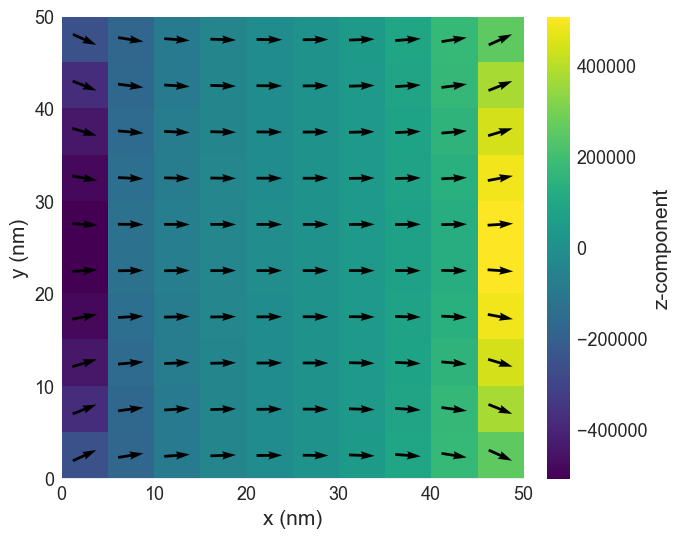

In [10]:
system.m.sel("z").mpl()